In [322]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

# Load NYC Data

In [184]:
nyc = gpd.read_file('data/geojson/combinedneighborhoods.geojson')
nyc = nyc[['Unique Identifier','geometry']]
nyc.columns=['neighborhood_id','geometry']
nyc.head()

,neighborhood_id,geometry
0,1,POLYGON ((-73.85663664103342 40.85811529295128...
1,2,POLYGON ((-74.17185166456856 40.56152092302123...
2,3,POLYGON ((-73.90202516499477 40.76741678384665...
3,4,POLYGON ((-74.00200394611576 40.59413237177825...
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...


# Load Feature Data & Normalize Necessary Columns (0-1)

- merged[0:2] are neighborhood IDs/names
- merged[2:216] are qualitative features
- merged[216:] are quantitative features

In [290]:
df = pd.read_csv('cleaned_data/merged.csv')

In [291]:
df.head()

,neighborhood_id,neighborhood,accessible,airport,amazing,american,anywhere,architecture,art,artists,...,DrugHospPopPercent,PsychHospPopPercent,StrokeHospPopPercent,HIVPopPercent,HepBPopPercent,HepCPopPercent,TBPopPercent,GonorrheaPopPercent,SyphilisPopPercent,PrematureMortalityPopPercent
0,1,Allerton,0.035714,0.017857,0.017857,0.000000,0.017857,0.000000,0.000000,0.000000,...,1.063443,0.676279,0.349523,0.028723,0.06609,0.106615,0.005771,0.184327,0.034544,0.181910
1,2,Arden Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.519000,0.522500,0.287600,0.000000,0.01240,0.042500,0.003900,0.000000,0.000000,0.140000
2,3,Astoria,0.008475,0.042373,0.110169,0.037288,0.008475,0.003390,0.020339,0.011864,...,0.402325,0.462069,0.282341,0.041906,0.04860,0.071517,0.008766,0.185412,0.054593,0.134602
3,4,Bath Beach,0.052632,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.296500,0.314500,0.261000,0.000000,0.19090,0.087900,0.014600,0.021900,0.000000,0.126400
4,5,Financial District,0.003311,0.029801,0.024834,0.048013,0.006623,0.019868,0.001656,0.000000,...,0.381600,0.330400,0.272800,0.028700,0.05840,0.062700,0.003900,0.162400,0.044700,0.079200


In [292]:
print(df.columns.tolist())

['neighborhood_id', 'neighborhood', 'accessible', 'airport', 'amazing', 'american', 'anywhere', 'architecture', 'art', 'artists', 'authentic', 'available', 'awesome', 'bakery', 'banks', 'bar', 'barclays', 'bars', 'beautiful', 'beer', 'big', 'bike', 'botanical', 'boutiques', 'bridge', 'brownstones', 'brunch', 'buildings', 'bus', 'buses', 'bustling', 'cafe', 'cafes', 'called', 'caribbean', 'charming', 'chinese', 'circle', 'class', 'clubs', 'coffee', 'columbus', 'come', 'community', 'convenience', 'convenient', 'conveniently', 'cool', 'corner', 'couple', 'cuisine', 'cultural', 'culture', 'cute', 'deli', 'delicious', 'delis', 'different', 'dining', 'diverse', 'diversity', 'door', 'drink', 'easily', 'eat', 'eateries', 'enjoy', 'entertainment', 'every', 'experience', 'explore', 'express', 'families', 'family', 'famous', 'fantastic', 'fast', 'favorite', 'filled', 'five', 'food', 'free', 'friendly', 'front', 'fun', 'galleries', 'garden', 'good', 'green', 'groceries', 'grocery', 'guests', 'hall

In [293]:
unstandardized = ['num_listings', 'price_norm', 'AdultCareFacilities', 'Clinics', 'CommunityHealthCenters', 'DiagnosticTreatmentCenters', 'Hospitals', 'NursingHomes', 'SchoolBasedHealthFacilities', 'Daycares', 'TotalPop', 'shape_area', 'rating_b',]
standardized = pd.DataFrame(normalize(df[unstandardized],axis=0))
standardized.columns = unstandardized
standardized.head()

,num_listings,price_norm,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,SchoolBasedHealthFacilities,Daycares,TotalPop,shape_area,rating_b
0,0.008866,0.053131,0.149487,0.026126,0.0,0.071589,0.000000,0.289167,0.000000,0.076624,0.081977,0.060871,0.085793
1,0.000576,0.048271,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006453,0.030227,0.065458,0.084464
2,0.105816,0.101656,0.000000,0.078379,0.0,0.071589,0.102062,0.041310,0.036202,0.069365,0.125435,0.071358,0.086904
3,0.003109,0.068574,0.000000,0.026126,0.0,0.017897,0.000000,0.041310,0.000000,0.018551,0.037783,0.026664,0.078125
4,0.095798,0.144676,0.000000,0.000000,0.0,0.035794,0.102062,0.000000,0.000000,0.031456,0.050159,0.024690,0.073903


In [294]:
df.update(standardized)
df.loc[:,unstandardized]

,num_listings,price_norm,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,SchoolBasedHealthFacilities,Daycares,TotalPop,shape_area,rating_b
0,0.008866,0.053131,0.149487,0.026126,0.00000,0.071589,0.000000,0.289167,0.000000,0.076624,0.081977,0.060871,0.085793
1,0.000576,0.048271,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.006453,0.030227,0.065458,0.084464
2,0.105816,0.101656,0.000000,0.078379,0.00000,0.071589,0.102062,0.041310,0.036202,0.069365,0.125435,0.071358,0.086904
3,0.003109,0.068574,0.000000,0.026126,0.00000,0.017897,0.000000,0.041310,0.000000,0.018551,0.037783,0.026664,0.078125
4,0.095798,0.144676,0.000000,0.000000,0.00000,0.035794,0.102062,0.000000,0.000000,0.031456,0.050159,0.024690,0.073903
5,0.000691,0.213880,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.005646,0.026045,0.060110,0.084894
6,0.004721,0.057387,0.000000,0.000000,0.00000,0.071589,0.000000,0.082619,0.000000,0.040328,0.055097,0.104916,0.080123
7,0.005872,0.063476,0.373718,0.078379,0.00000,0.053691,0.102062,0.330477,0.072405,0.075011,0.061707,0.070326,0.087151
8,0.435814,0.072262,0.000000,0.052253,0.11547,0.107383,0.000000,0.041310,0.108607,0.162926,0.162727,0.083151,0.089925
9,0.001267,0.076684,0.000000,0.026126,0.00000,0.000000,0.000000,0.000000,0.000000,0.010485,0.031415,0.071656,0.080068


In [295]:
percents = ['FemalePopPercent', 'PopU18PopPercent', 'Pop18t24PopPercent', 'Pop25t44PopPercent', 'Pop45t64PopPercent', 'Pop65plPopPercent', 'HispanicPopPercent', 'WhiteNonHispPopPercent', 'BlackNonHispPopPercent', 'AsianPIPopPercent', 'OtherRacePopPercent', 'ForeignBornPopPercent', 'LimitedEngPopPercent', 'EduLessThanHSPopPercent', 'PovertyPopPercent', 'FoodStampSNAPPopPercent', 'UnemploymentPopPercent', 'DisabilityPopPercent', 'DisabilityVisionPopPercent', 'DisabilityCognitivePopPercent', 'DisabilityAmbulatoryPopPercent', 'DisabilitySelfCarePopPercent', 'DisabilityIndepLivPopPercent', 'HealthInsPopPercent', 'MedicaidEnrollPopPercent', 'AlcoholRetailersPopPercent', 'TobaccoRetailersPopPercent', 'FelonyCrimePopPercent', 'PropertyCrimePopPercent', 'ViolentCrimePopPercent', 'JailIncarcerationPopPercent', 'AssaultHospPopPercent', 'AlcoholHospPopPercent', 'DrugHospPopPercent', 'PsychHospPopPercent', 'StrokeHospPopPercent', 'HIVPopPercent', 'HepBPopPercent', 'HepCPopPercent', 'TBPopPercent', 'GonorrheaPopPercent', 'SyphilisPopPercent', 'PrematureMortalityPopPercent']
df.update(df[percents]/100)
df.loc[:,percents]

,FemalePopPercent,PopU18PopPercent,Pop18t24PopPercent,Pop25t44PopPercent,Pop45t64PopPercent,Pop65plPopPercent,HispanicPopPercent,WhiteNonHispPopPercent,BlackNonHispPopPercent,AsianPIPopPercent,...,DrugHospPopPercent,PsychHospPopPercent,StrokeHospPopPercent,HIVPopPercent,HepBPopPercent,HepCPopPercent,TBPopPercent,GonorrheaPopPercent,SyphilisPopPercent,PrematureMortalityPopPercent
0,0.512237,0.227275,0.097200,0.279476,0.252312,0.143249,0.415992,0.187734,0.308387,0.065012,...,0.010634,0.006763,0.003495,0.000287,0.000661,0.001066,0.000058,0.001843,0.000345,0.001819
1,0.505000,0.210000,0.092000,0.267000,0.303000,0.128000,0.119000,0.796000,0.014000,0.063000,...,0.005190,0.005225,0.002876,0.000000,0.000124,0.000425,0.000039,0.000000,0.000000,0.001400
2,0.500823,0.140895,0.102036,0.425221,0.209708,0.123044,0.294479,0.470377,0.063010,0.146859,...,0.004023,0.004621,0.002823,0.000419,0.000486,0.000715,0.000088,0.001854,0.000546,0.001346
3,0.491000,0.202000,0.074000,0.317000,0.247000,0.159000,0.152000,0.472000,0.012000,0.352000,...,0.002965,0.003145,0.002610,0.000000,0.001909,0.000879,0.000146,0.000219,0.000000,0.001264
4,0.516000,0.138000,0.110000,0.529000,0.160000,0.064000,0.091000,0.653000,0.029000,0.197000,...,0.003816,0.003304,0.002728,0.000287,0.000584,0.000627,0.000039,0.001624,0.000447,0.000792
5,0.528000,0.148000,0.074000,0.220000,0.303000,0.255000,0.085000,0.677000,0.004000,0.209000,...,0.001245,0.003567,0.002877,0.000000,0.000503,0.000389,0.000030,0.000204,0.000000,0.000927
6,0.520000,0.193000,0.072000,0.273000,0.296000,0.167000,0.149000,0.415000,0.017000,0.386000,...,0.001509,0.003016,0.002069,0.000021,0.000838,0.000489,0.000021,0.000225,0.000000,0.000725
7,0.533000,0.284000,0.105000,0.248000,0.227000,0.134000,0.278000,0.252000,0.420000,0.030000,...,0.006062,0.013400,0.004088,0.000211,0.000476,0.000983,0.000013,0.001158,0.000124,0.002344
8,0.530913,0.270735,0.113723,0.316763,0.208386,0.089393,0.193960,0.187022,0.576336,0.025081,...,0.014917,0.009304,0.004190,0.000568,0.000483,0.001181,0.000066,0.003091,0.000842,0.002596
9,0.515000,0.203000,0.101000,0.260000,0.304000,0.132000,0.198000,0.306000,0.057000,0.398000,...,0.005837,0.016918,0.002158,0.000038,0.000400,0.000689,0.000088,0.000319,0.000113,0.000919


# Split Qualitative & Quantitative Datasets

In [296]:
qual = df.iloc[:,:216]
print(qual.shape)
qual.head()

(144, 216)


,neighborhood_id,neighborhood,accessible,airport,amazing,american,anywhere,architecture,art,artists,...,vintage,visit,walking,waterfront,well,wine,wonderful,world,young,zoo
0,1,Allerton,0.035714,0.017857,0.017857,0.000000,0.017857,0.000000,0.000000,0.000000,...,0.000000,0.017857,0.250000,0.000000,0.232143,0.000000,0.000000,0.035714,0.000000,0.428571
1,2,Arden Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,Astoria,0.008475,0.042373,0.110169,0.037288,0.008475,0.003390,0.020339,0.011864,...,0.000000,0.028814,0.177966,0.013559,0.147458,0.018644,0.057627,0.100000,0.076271,0.003390
3,4,Bath Beach,0.052632,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000
4,5,Financial District,0.003311,0.029801,0.024834,0.048013,0.006623,0.019868,0.001656,0.000000,...,0.028146,0.019868,0.087748,0.026490,0.092715,0.009934,0.008278,0.240066,0.004967,0.000000


In [297]:
quant = pd.concat([df.iloc[:,:2],df.iloc[:,216:]],axis=1)
print(quant.shape)
quant.head()

(144, 58)


,neighborhood_id,neighborhood,num_listings,price_norm,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,...,DrugHospPopPercent,PsychHospPopPercent,StrokeHospPopPercent,HIVPopPercent,HepBPopPercent,HepCPopPercent,TBPopPercent,GonorrheaPopPercent,SyphilisPopPercent,PrematureMortalityPopPercent
0,1,Allerton,0.008866,0.053131,0.149487,0.026126,0.0,0.071589,0.000000,0.289167,...,0.010634,0.006763,0.003495,0.000287,0.000661,0.001066,0.000058,0.001843,0.000345,0.001819
1,2,Arden Heights,0.000576,0.048271,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.005190,0.005225,0.002876,0.000000,0.000124,0.000425,0.000039,0.000000,0.000000,0.001400
2,3,Astoria,0.105816,0.101656,0.000000,0.078379,0.0,0.071589,0.102062,0.041310,...,0.004023,0.004621,0.002823,0.000419,0.000486,0.000715,0.000088,0.001854,0.000546,0.001346
3,4,Bath Beach,0.003109,0.068574,0.000000,0.026126,0.0,0.017897,0.000000,0.041310,...,0.002965,0.003145,0.002610,0.000000,0.001909,0.000879,0.000146,0.000219,0.000000,0.001264
4,5,Financial District,0.095798,0.144676,0.000000,0.000000,0.0,0.035794,0.102062,0.000000,...,0.003816,0.003304,0.002728,0.000287,0.000584,0.000627,0.000039,0.001624,0.000447,0.000792


# Try K-Means to see if there's an optimal number of clusters

## Combined Data

In [132]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,145):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 139.57264556003568
2 127.77090747103064
3 116.488005948645
4 111.85048745719962
5 105.04332808377819
6 99.31920685594972
7 96.63699225358643
8 95.53641565291069
9 93.66757886273618
10 89.3708370591067
11 86.18675328099093
12 82.79827199299197
13 83.53874426790625
14 81.34900029393923
15 78.8462194718711
16 75.24494839169449
17 74.56183982565229
18 71.90992408526199
19 70.76912118277977
20 69.0185337436049
21 65.88931679436857
22 65.24046241928279
23 62.949663068517204
24 62.743912584699395
25 59.9609446193263
26 59.787827138864266
27 57.49969716857833
28 58.270337985558015
29 57.30298104406083
30 56.42069514186266
31 53.44093764339174
32 53.28105919121383
33 51.60074709288409
34 50.70882238897799
35 49.08640728400174
36 49.23821747703512
37 48.31035290516291
38 47.78983958887707
39 46.26973270837981
40 45.97943675615103
41 43.80973713363863
42 44.04481160064188
43 43.156075183246756
44 41.898620690163014
45 41.359445995752324
46 41.12118028468972
47 40.52619311466328
48 39.7533694325

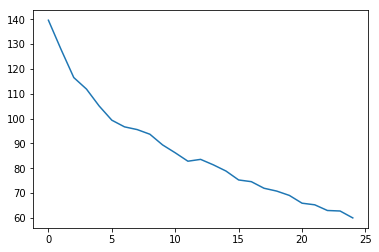

In [138]:
error_df[:25]['inertia'].plot()

## Qualitative Data

In [139]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:216].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 132.33944041053167
2 121.05187670328678
3 111.90908575122961
4 100.59023242888856
5 97.97438931802864
6 95.6608383398916
7 92.30233723290242
8 87.14280649608365
9 84.42703319080795
10 81.33062961549123
11 78.92219115553239
12 78.21896909865973
13 74.96265565333607
14 70.79150741046541
15 71.28393257960042
16 69.31124346846718
17 67.41545768194119
18 65.99627410999057
19 64.371844337781
20 62.04176749581755
21 59.361096353422084
22 59.19583077791714
23 57.18851735007675
24 56.35553558221093
25 54.87978696548073
26 53.54033671563603
27 52.13031672418919
28 52.20283065124598
29 50.45943623956828
30 48.88193250469901
31 48.53081998219042
32 47.43490005542699
33 46.31952464963892
34 46.07834090273164
35 45.00793462441629
36 44.499288356421886
37 42.63293657576435
38 42.15807108563537
39 41.93541075451874
40 41.11776831151865
41 40.013894288824254
42 39.552750103245025
43 38.94360556592101
44 38.22659306327302
45 36.753700817533314
46 36.2770228709086
47 36.05279747569636
48 34.98112980465

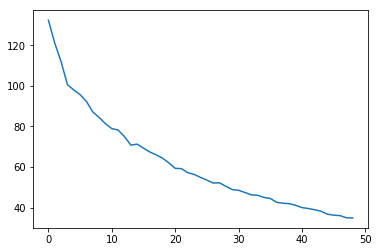

In [140]:
error_df['inertia'].plot()

## Quantitative Data

In [141]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,216:].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 7.2332051495040215
2 5.263209074153703
3 4.650937344618088
4 4.272121376120184
5 3.886246478236547
6 3.5244932103941427
7 3.3603246689514146
8 3.1439318086200867
9 2.931074356966268
10 2.9088165389442198
11 2.730735626106487
12 2.563118145360875
13 2.3587983864322317
14 2.3084806374390254
15 2.1677870836112616
16 2.1042286651566506
17 1.9783888090516062
18 1.8933925992293232
19 1.8496218209560147
20 1.7741679901001808
21 1.6682247687318164
22 1.6511407481455929
23 1.589011321070721
24 1.4814913939189507
25 1.4671715637939717
26 1.4124263204918308
27 1.3437935244837238
28 1.296946008791316
29 1.2593363545069658
30 1.2179950471324221
31 1.1286002107164603
32 1.1321483589246484
33 1.030788769501656
34 1.0167969174677929
35 1.0093567853507703
36 0.9348304698228002
37 0.9284303843382429
38 0.9128897491109061
39 0.8422033564472236
40 0.820834638843762
41 0.7932075536760598
42 0.7570403538812929
43 0.7287011339389943
44 0.7128699141874768
45 0.6844416983761628
46 0.6606960604346787
47 0.648

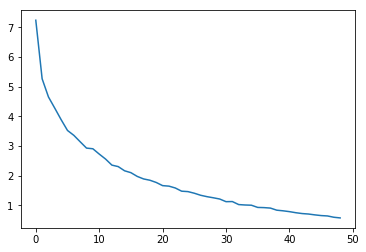

In [142]:
error_df['inertia'].plot()

Let's try 10 clusters for now

# Run Clustering and PCA

In [161]:
pc_cols = ['pc1','pc2','pc3'] # get top 3 principal components

## Combined Dataset

In [298]:
df.columns

Index(['neighborhood_id', 'neighborhood', 'accessible', 'airport', 'amazing',
       'american', 'anywhere', 'architecture', 'art', 'artists',
       ...
       'DrugHospPopPercent', 'PsychHospPopPercent', 'StrokeHospPopPercent',
       'HIVPopPercent', 'HepBPopPercent', 'HepCPopPercent', 'TBPopPercent',
       'GonorrheaPopPercent', 'SyphilisPopPercent',
       'PrematureMortalityPopPercent'],
      dtype='object', length=272)

In [299]:
features = df.iloc[:,2:].values
features

array([[0.03571429, 0.01785714, 0.01785714, ..., 0.00184327, 0.00034544,
        0.0018191 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0014    ],
       [0.00847458, 0.04237288, 0.11016949, ..., 0.00185412, 0.00054593,
        0.00134602],
       ...,
       [0.02777778, 0.        , 0.12962963, ..., 0.000681  , 0.        ,
        0.001111  ],
       [0.        , 0.06756757, 0.        , ..., 0.000767  , 0.000245  ,
        0.001262  ],
       [0.        , 0.13690476, 0.03571429, ..., 0.00071   , 0.000437  ,
        0.000952  ]])

In [300]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)
pca_by_neighborhood = pd.DataFrame(data = principalComponents, columns = pc_cols)
pca.explained_variance_ratio_

array([0.16034551, 0.08828947, 0.06799701])

In [301]:
pcaFeaturesDf = pd.DataFrame(data = pca.components_.T, columns = pc_cols)
pcaFeaturesDf = pd.concat([pcaFeaturesDf,pd.Series(df.columns[2:])],axis=1)
pcaFeaturesDf.head()

,pc1,pc2,pc3,0
0,-0.011532,0.006346,-0.006748,accessible
1,0.002465,0.109942,-0.049777,airport
2,0.020859,-0.067347,-0.016966,amazing
3,-0.016926,-0.017007,-0.001952,american
4,0.004983,-0.011384,-0.004970,anywhere


In [303]:
pcaFeaturesDf.iloc[(-np.abs(pcaFeaturesDf['pc1'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
234,0.579927,-0.024569,0.049326,WhiteNonHispPopPercent
233,-0.336177,-0.206398,0.084178,HispanicPopPercent
251,-0.308439,-0.117131,0.033143,MedicaidEnrollPopPercent
235,-0.299294,0.259576,-0.025078,BlackNonHispPopPercent
242,-0.284119,-0.110880,0.079253,FoodStampSNAPPopPercent
240,-0.201102,-0.092930,0.034861,EduLessThanHSPopPercent
241,-0.190098,-0.133151,0.062068,PovertyPopPercent
161,0.150043,-0.394232,-0.135643,restaurants
239,-0.128353,-0.137625,-0.032915,LimitedEngPopPercent
238,-0.118779,-0.013999,-0.107290,ForeignBornPopPercent


In [304]:
pcaFeaturesDf.iloc[(-np.abs(pcaFeaturesDf['pc2'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
161,0.150043,-0.394232,-0.135643,restaurants
15,0.105380,-0.373558,-0.085601,bars
156,0.074029,0.261878,-0.077884,quiet
235,-0.299294,0.259576,-0.025078,BlackNonHispPopPercent
120,-0.023739,0.257107,-0.033433,mall
233,-0.336177,-0.206398,0.084178,HispanicPopPercent
169,0.050356,-0.162460,-0.063445,shops
38,0.018942,-0.160319,-0.025454,coffee
26,-0.004284,0.158707,0.027006,bus
239,-0.128353,-0.137625,-0.032915,LimitedEngPopPercent


In [305]:
pcaFeaturesDf.iloc[(-np.abs(pcaFeaturesDf['pc3'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
62,0.059435,-0.006574,0.316042,eat
79,0.022414,0.028932,0.285699,free
150,0.041682,0.007207,0.277855,places
179,-0.017546,-0.034174,0.271381,stores
133,0.001775,0.008367,0.260129,neighbors
206,0.031868,0.032911,0.259205,walking
130,0.044302,-0.072967,0.253173,music
82,0.030083,-0.030377,0.253047,fun
118,0.016611,-0.035887,0.252911,love
142,0.020963,0.000650,0.251621,outside


In [306]:
Kmean = KMeans(n_clusters=10)
Kmean.fit(features)
Kmean.labels_

array([3, 1, 7, 1, 7, 1, 1, 4, 5, 1, 9, 2, 1, 1, 2, 1, 7, 4, 5, 4, 4, 3,
       1, 8, 7, 1, 5, 7, 9, 7, 3, 2, 1, 9, 9, 9, 4, 9, 7, 1, 1, 7, 1, 2,
       4, 5, 9, 4, 7, 3, 2, 1, 5, 4, 2, 9, 1, 7, 7, 1, 1, 7, 7, 2, 7, 4,
       5, 7, 9, 4, 1, 3, 9, 2, 4, 2, 2, 1, 1, 3, 7, 4, 5, 9, 5, 1, 5, 5,
       1, 7, 1, 1, 7, 9, 9, 9, 1, 1, 1, 9, 2, 9, 3, 2, 1, 7, 4, 4, 4, 7,
       1, 2, 1, 5, 4, 4, 6, 9, 9, 2, 4, 4, 3, 7, 2, 5, 3, 9, 7, 3, 9, 7,
       7, 4, 5, 0, 7, 2, 1, 4, 5, 7, 2, 5], dtype=int32)

In [307]:
df['kmean'] = Kmean.labels_
df[['kmean','neighborhood_id','neighborhood']].head()

,kmean,neighborhood_id,neighborhood
0,3,1,Allerton
1,1,2,Arden Heights
2,7,3,Astoria
3,1,4,Bath Beach
4,7,5,Financial District


In [308]:
pca_by_neighborhood = pd.concat([pca_by_neighborhood, df[['kmean','neighborhood_id','neighborhood']]], axis = 1)
pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,-0.342434,0.280885,-0.046777,3,1,Allerton
1,0.584230,0.331293,-0.095328,1,2,Arden Heights
2,0.234346,-0.466589,-0.124597,7,3,Astoria
3,0.167148,-0.012664,-0.117001,1,4,Bath Beach
4,0.558520,-0.069853,-0.043974,7,5,Financial District


In [309]:
nyc_all = nyc.merge(pca_by_neighborhood,on='neighborhood_id')
nyc_all.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,neighborhood
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,-0.342434,0.280885,-0.046777,3,Allerton
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,0.584230,0.331293,-0.095328,1,Arden Heights
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,0.234346,-0.466589,-0.124597,7,Astoria
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,0.167148,-0.012664,-0.117001,1,Bath Beach
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,0.558520,-0.069853,-0.043974,7,Financial District


## Qualitative Features Only

In [245]:
qual.columns[2:]

Index(['accessible', 'airport', 'amazing', 'american', 'anywhere',
       'architecture', 'art', 'artists', 'authentic', 'available',
       ...
       'vintage', 'visit', 'walking', 'waterfront', 'well', 'wine',
       'wonderful', 'world', 'young', 'zoo'],
      dtype='object', length=214)

In [246]:
qual_features = qual.iloc[:,2:].values
qual_features

array([[0.03571429, 0.01785714, 0.01785714, ..., 0.03571429, 0.        ,
        0.42857143],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00847458, 0.04237288, 0.11016949, ..., 0.1       , 0.07627119,
        0.00338983],
       ...,
       [0.02777778, 0.        , 0.12962963, ..., 0.05555556, 0.00925926,
        0.09259259],
       [0.        , 0.06756757, 0.        , ..., 0.01351351, 0.        ,
        0.        ],
       [0.        , 0.13690476, 0.03571429, ..., 0.11904762, 0.        ,
        0.        ]])

In [247]:
qual_pca = PCA(n_components=3)
qualPrincipalComponents = qual_pca.fit_transform(qual_features)
qual_pca_by_neighborhood = pd.DataFrame(data = qualPrincipalComponents, columns = pc_cols)
qual_pca.explained_variance_ratio_

array([0.11237964, 0.09361227, 0.08949201])

In [248]:
qualPcaFeaturesDf = pd.DataFrame(data = qual_pca.components_.T, columns = pc_cols)
qualPcaFeaturesDf = pd.concat([qualPcaFeaturesDf,pd.Series(qual.columns[2:])],axis=1)
qualPcaFeaturesDf.head()

,pc1,pc2,pc3,0
0,0.002086,-0.004718,0.007907,accessible
1,-0.095310,-0.023843,0.064978,airport
2,0.080997,-0.023192,-0.016172,amazing
3,0.008143,-0.005386,-0.006795,american
4,0.012516,-0.006538,-0.010418,anywhere


In [249]:
qualPcaFeaturesDf.iloc[(-np.abs(qualPcaFeaturesDf['pc1'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
161,0.568279,-0.061438,0.274702,restaurants
15,0.435719,-0.118988,-0.119759,bars
120,-0.224753,0.018233,0.109917,mall
169,0.218441,-0.049401,0.061679,shops
38,0.180211,-0.043224,-0.039741,coffee
156,-0.171009,0.018642,0.283820,quiet
30,0.127158,-0.036427,-0.040201,cafes
168,-0.126351,-0.067489,0.007045,shopping
26,-0.111270,0.095675,0.268445,bus
181,0.106589,-0.061319,-0.028192,subway


In [250]:
qualPcaFeaturesDf.iloc[(-np.abs(qualPcaFeaturesDf['pc2'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
62,0.080486,0.364517,0.107579,eat
150,0.025737,0.296330,-0.020475,places
79,-0.000714,0.291219,-0.040302,free
206,0.009679,0.282378,-0.019539,walking
179,0.042687,0.274492,-0.027613,stores
82,0.043293,0.240727,-0.131471,fun
142,0.001416,0.240672,-0.128631,outside
133,-0.008015,0.239335,-0.147902,neighbors
91,0.024477,0.238581,-0.121410,happy
118,0.043595,0.230604,-0.154922,love


In [251]:
qualPcaFeaturesDf.iloc[(-np.abs(qualPcaFeaturesDf['pc3'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
156,-0.171009,0.018642,0.283820,quiet
161,0.568279,-0.061438,0.274702,restaurants
26,-0.111270,0.095675,0.268445,bus
103,0.055228,0.107329,0.253040,italian
78,0.047704,0.059756,0.237410,food
160,0.067302,0.106652,0.236262,restaurant
149,0.050684,0.108826,0.229396,pizza
99,-0.017037,0.072357,0.205778,house
71,-0.009367,0.060893,0.173623,family
130,0.102044,0.227051,-0.164868,music


In [252]:
Kmean = KMeans(n_clusters=10)
Kmean.fit(qual_features)
Kmean.labels_

array([0, 0, 6, 0, 6, 2, 6, 0, 1, 0, 0, 0, 0, 0, 0, 6, 1, 0, 1, 0, 0, 0,
       5, 7, 6, 4, 1, 1, 0, 1, 8, 0, 0, 0, 6, 0, 1, 0, 6, 0, 0, 1, 0, 0,
       0, 6, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 6, 1, 6, 0, 0, 1, 6, 0, 1, 0,
       6, 6, 6, 0, 0, 0, 0, 6, 0, 0, 6, 6, 0, 0, 6, 0, 6, 0, 1, 6, 6, 6,
       0, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 1, 0, 6, 1,
       0, 0, 0, 6, 6, 0, 3, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 0, 1, 0, 0, 6,
       6, 0, 6, 0, 1, 0, 0, 0, 1, 6, 0, 6], dtype=int32)

In [253]:
qual['kmean'] = Kmean.labels_
qual[['kmean','neighborhood_id','neighborhood']].head()

,kmean,neighborhood_id,neighborhood
0,0,1,Allerton
1,0,2,Arden Heights
2,6,3,Astoria
3,0,4,Bath Beach
4,6,5,Financial District


In [254]:
qual_pca_by_neighborhood = pd.concat([qual_pca_by_neighborhood, qual[['kmean','neighborhood_id','neighborhood']]], axis = 1)
qual_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,-0.328851,-0.045605,0.109541,0,1,Allerton
1,-0.274258,-0.132124,-0.045700,0,2,Arden Heights
2,0.460293,-0.116008,-0.053092,6,3,Astoria
3,-0.079297,-0.097005,-0.091405,0,4,Bath Beach
4,0.054507,-0.095710,-0.322358,6,5,Financial District


In [255]:
nyc_qual = nyc.merge(qual_pca_by_neighborhood,on='neighborhood_id')
nyc_qual.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,neighborhood
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,-0.328851,-0.045605,0.109541,0,Allerton
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.274258,-0.132124,-0.045700,0,Arden Heights
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,0.460293,-0.116008,-0.053092,6,Astoria
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,-0.079297,-0.097005,-0.091405,0,Bath Beach
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,0.054507,-0.095710,-0.322358,6,Financial District


## Quantitative Only

In [263]:
quant.columns

Index(['neighborhood_id', 'neighborhood', 'num_listings', 'price_norm',
       'AdultCareFacilities', 'Clinics', 'CommunityHealthCenters',
       'DiagnosticTreatmentCenters', 'Hospitals', 'NursingHomes',
       'SchoolBasedHealthFacilities', 'Daycares', 'TotalPop', 'shape_area',
       'rating_b', 'FemalePopPercent', 'PopU18PopPercent',
       'Pop18t24PopPercent', 'Pop25t44PopPercent', 'Pop45t64PopPercent',
       'Pop65plPopPercent', 'HispanicPopPercent', 'WhiteNonHispPopPercent',
       'BlackNonHispPopPercent', 'AsianPIPopPercent', 'OtherRacePopPercent',
       'ForeignBornPopPercent', 'LimitedEngPopPercent',
       'EduLessThanHSPopPercent', 'PovertyPopPercent',
       'FoodStampSNAPPopPercent', 'UnemploymentPopPercent',
       'DisabilityPopPercent', 'DisabilityVisionPopPercent',
       'DisabilityCognitivePopPercent', 'DisabilityAmbulatoryPopPercent',
       'DisabilitySelfCarePopPercent', 'DisabilityIndepLivPopPercent',
       'HealthInsPopPercent', 'MedicaidEnrollPopPercent',

In [264]:
quant_features = quant.iloc[:,2:].values
quant_features

array([[0.00886596, 0.0531311 , 0.14948702, ..., 0.00184327, 0.00034544,
        0.0018191 ],
       [0.00057571, 0.04827083, 0.        , ..., 0.        , 0.        ,
        0.0014    ],
       [0.10581586, 0.10165559, 0.        , ..., 0.00185412, 0.00054593,
        0.00134602],
       ...,
       [0.0173865 , 0.07105722, 0.        , ..., 0.000681  , 0.        ,
        0.001111  ],
       [0.01070824, 0.05328525, 0.        , ..., 0.000767  , 0.000245  ,
        0.001262  ],
       [0.02832503, 0.06799497, 0.        , ..., 0.00071   , 0.000437  ,
        0.000952  ]])

In [265]:
quant_pca = PCA(n_components=3)
quantPrincipalComponents = quant_pca.fit_transform(quant_features)
quant_pca_by_neighborhood = pd.DataFrame(data = quantPrincipalComponents, columns = pc_cols)
quant_pca.explained_variance_ratio_

array([0.48857834, 0.19611031, 0.0940606 ])

In [266]:
quantPcaFeaturesDf = pd.DataFrame(data = quant_pca.components_.T, columns = pc_cols)
quantPcaFeaturesDf = pd.concat([quantPcaFeaturesDf,pd.Series(quant.columns[2:])],axis=1)
quantPcaFeaturesDf.head()

,pc1,pc2,pc3,0
0,-0.017061,0.009925,-0.072344,num_listings
1,-0.033066,0.002097,-0.010402,price_norm
2,-0.006408,-0.009149,0.011934,AdultCareFacilities
3,0.012164,-0.023826,-0.040831,Clinics
4,0.032036,-0.019213,-0.038462,CommunityHealthCenters


In [267]:
quantPcaFeaturesDf.iloc[(-np.abs(quantPcaFeaturesDf['pc1'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
20,-0.622867,-0.197969,-0.282946,WhiteNonHispPopPercent
19,0.368968,-0.366296,-0.329584,HispanicPopPercent
37,0.332392,-0.207672,0.024582,MedicaidEnrollPopPercent
21,0.313093,0.743104,0.037287,BlackNonHispPopPercent
28,0.307710,-0.101942,-0.247828,FoodStampSNAPPopPercent
26,0.219426,-0.155849,-0.039808,EduLessThanHSPopPercent
27,0.209336,-0.117689,-0.194232,PovertyPopPercent
25,0.140589,-0.347418,0.271626,LimitedEngPopPercent
24,0.122347,-0.117625,0.538950,ForeignBornPopPercent
14,0.089385,-0.008799,-0.074287,PopU18PopPercent


In [268]:
quantPcaFeaturesDf.iloc[(-np.abs(quantPcaFeaturesDf['pc2'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
21,0.313093,0.743104,0.037287,BlackNonHispPopPercent
19,0.368968,-0.366296,-0.329584,HispanicPopPercent
25,0.140589,-0.347418,0.271626,LimitedEngPopPercent
37,0.332392,-0.207672,0.024582,MedicaidEnrollPopPercent
20,-0.622867,-0.197969,-0.282946,WhiteNonHispPopPercent
22,-0.059780,-0.188024,0.531842,AsianPIPopPercent
26,0.219426,-0.155849,-0.039808,EduLessThanHSPopPercent
27,0.209336,-0.117689,-0.194232,PovertyPopPercent
24,0.122347,-0.117625,0.538950,ForeignBornPopPercent
28,0.307710,-0.101942,-0.247828,FoodStampSNAPPopPercent


In [269]:
quantPcaFeaturesDf.iloc[(-np.abs(quantPcaFeaturesDf['pc3'].values)).argsort()].head(10)

,pc1,pc2,pc3,0
24,0.122347,-0.117625,0.538950,ForeignBornPopPercent
22,-0.059780,-0.188024,0.531842,AsianPIPopPercent
19,0.368968,-0.366296,-0.329584,HispanicPopPercent
20,-0.622867,-0.197969,-0.282946,WhiteNonHispPopPercent
25,0.140589,-0.347418,0.271626,LimitedEngPopPercent
28,0.307710,-0.101942,-0.247828,FoodStampSNAPPopPercent
27,0.209336,-0.117689,-0.194232,PovertyPopPercent
8,0.051570,-0.035581,-0.115254,SchoolBasedHealthFacilities
36,-0.085065,0.066457,-0.090970,HealthInsPopPercent
17,-0.028080,0.026655,0.075446,Pop45t64PopPercent


In [270]:
Kmean = KMeans(n_clusters=10)
Kmean.fit(quant_features)
Kmean.labels_

array([9, 7, 5, 5, 3, 7, 5, 6, 6, 5, 2, 5, 5, 7, 4, 5, 3, 6, 9, 8, 8, 9,
       7, 7, 3, 7, 4, 7, 2, 1, 8, 4, 7, 2, 2, 9, 6, 9, 7, 7, 5, 1, 5, 9,
       8, 9, 2, 6, 3, 8, 4, 7, 6, 8, 4, 2, 5, 1, 7, 5, 7, 3, 3, 5, 3, 1,
       6, 3, 2, 8, 7, 1, 2, 4, 6, 5, 5, 5, 5, 9, 3, 8, 9, 2, 9, 5, 9, 2,
       7, 3, 7, 7, 1, 2, 2, 2, 7, 7, 7, 9, 4, 2, 9, 1, 7, 3, 8, 8, 1, 7,
       5, 4, 7, 4, 6, 8, 7, 9, 2, 4, 8, 8, 1, 3, 5, 0, 1, 2, 3, 9, 2, 3,
       3, 8, 9, 7, 3, 6, 7, 6, 1, 7, 4, 4], dtype=int32)

In [271]:
quant['kmean'] = Kmean.labels_
quant[['kmean','neighborhood_id','neighborhood']].head()

,kmean,neighborhood_id,neighborhood
0,9,1,Allerton
1,7,2,Arden Heights
2,5,3,Astoria
3,5,4,Bath Beach
4,3,5,Financial District


In [272]:
quant_pca_by_neighborhood = pd.concat([quant_pca_by_neighborhood, quant[['kmean','neighborhood_id','neighborhood']]], axis = 1)
quant_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,0.242857,0.047837,-0.021577,9,1,Allerton
1,-0.632995,0.017022,-0.174222,7,2,Arden Heights
2,-0.156653,-0.155787,0.060009,5,3,Astoria
3,-0.156222,-0.263341,0.276852,5,4,Bath Beach
4,-0.575532,0.021532,0.009689,3,5,Financial District


In [273]:
nyc_quant = nyc.merge(quant_pca_by_neighborhood,on='neighborhood_id')
nyc_quant.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,neighborhood
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,0.242857,0.047837,-0.021577,9,Allerton
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.632995,0.017022,-0.174222,7,Arden Heights
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,-0.156653,-0.155787,0.060009,5,Astoria
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,-0.156222,-0.263341,0.276852,5,Bath Beach
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,-0.575532,0.021532,0.009689,3,Financial District


# PCA Plots of Data

## Combined

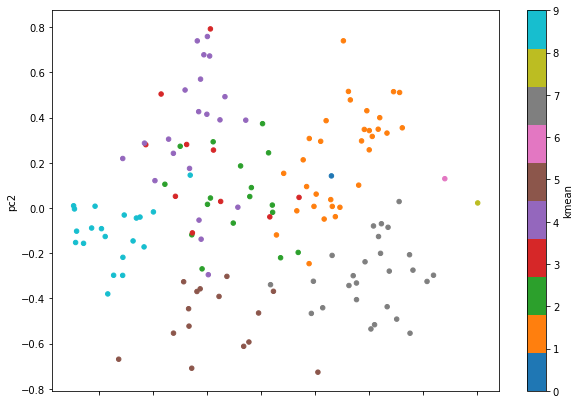

In [312]:
pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',colormap = 'tab10',figsize=(10,7))

## Qualitative

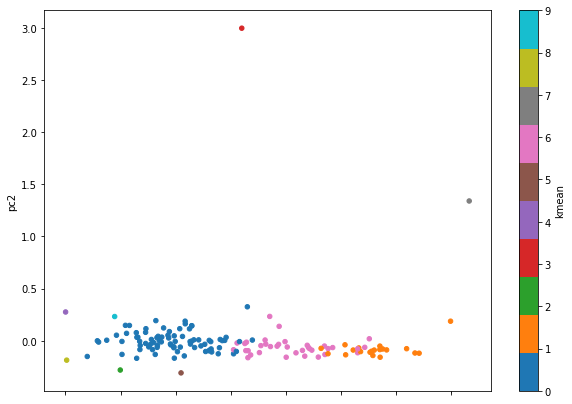

In [314]:
qual_pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',colormap = 'tab10',figsize=(10,7))

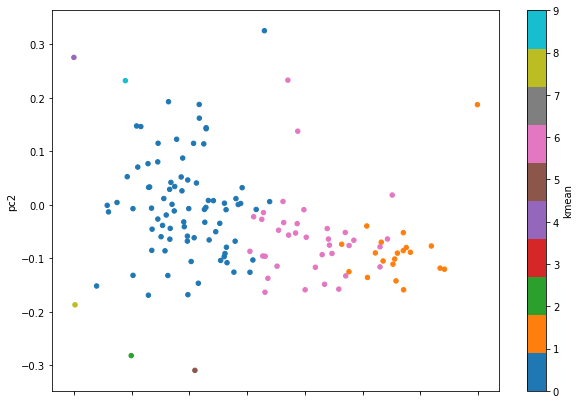

In [328]:
qual_pca_by_neighborhood[~qual_pca_by_neighborhood['kmean'].isin([3,7])].plot.scatter(x='pc1',y='pc2',c='kmean',colormap = 'tab10',figsize=(10,7))

## Quantitative

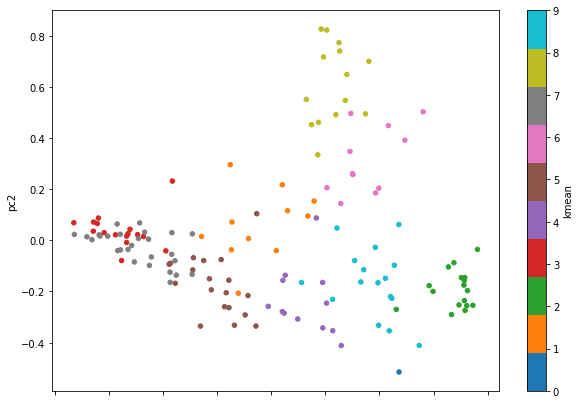

In [316]:
quant_pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',colormap = 'tab10',figsize=(10,7))

# PCA Features of each Dataset

In [338]:
[tuple(x) for x in quantPcaFeaturesDf.iloc[(-np.abs(quantPcaFeaturesDf['pc3'].values)).argsort()][['pc3',0]].values][:10]

[(0.538949867419602, 'ForeignBornPopPercent'),
 (0.5318419953091726, 'AsianPIPopPercent'),
 (-0.32958431392323223, 'HispanicPopPercent'),
 (-0.28294567181445435, 'WhiteNonHispPopPercent'),
 (0.2716258595549444, 'LimitedEngPopPercent'),
 (-0.24782755058546935, 'FoodStampSNAPPopPercent'),
 (-0.1942318805676391, 'PovertyPopPercent'),
 (-0.11525410506229428, 'SchoolBasedHealthFacilities'),
 (-0.09097030615476516, 'HealthInsPopPercent'),
 (0.07544591552680618, 'Pop45t64PopPercent')]

In [349]:
datasets = [('combined', pcaFeaturesDf),
              ('qualitative', qualPcaFeaturesDf),
              ('quantitative', quantPcaFeaturesDf)]
for dataset in datasets:
    print('\n',dataset[0])
    df = dataset[1]
    for pc in pc_cols:
        print(pc,':',[tuple(x) for x in df.iloc[(-np.abs(df[pc].values)).argsort()][[pc,0]].values[:10]])


 combined
pc1 : [(0.5799271594683745, 'WhiteNonHispPopPercent'), (-0.3361766486720392, 'HispanicPopPercent'), (-0.30843853757407597, 'MedicaidEnrollPopPercent'), (-0.2992940188488575, 'BlackNonHispPopPercent'), (-0.2841189026538858, 'FoodStampSNAPPopPercent'), (-0.2011016995022912, 'EduLessThanHSPopPercent'), (-0.1900984680390199, 'PovertyPopPercent'), (0.15004324847052583, 'restaurants'), (-0.12835306894396714, 'LimitedEngPopPercent'), (-0.11877919051726231, 'ForeignBornPopPercent')]
pc2 : [(-0.39423242848623813, 'restaurants'), (-0.3735584905166214, 'bars'), (0.26187822639932185, 'quiet'), (0.25957562559227243, 'BlackNonHispPopPercent'), (0.2571066666947096, 'mall'), (-0.2063975071242802, 'HispanicPopPercent'), (-0.16246043806807767, 'shops'), (-0.16031922175538155, 'coffee'), (0.15870661806547032, 'bus'), (-0.13762453503080002, 'LimitedEngPopPercent')]
pc3 : [(0.31604169034680774, 'eat'), (0.2856987031354885, 'free'), (0.2778548891129931, 'places'), (0.27138135631857463, 'stores'),

# Maps Plotting Clustered Neighborhoods

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


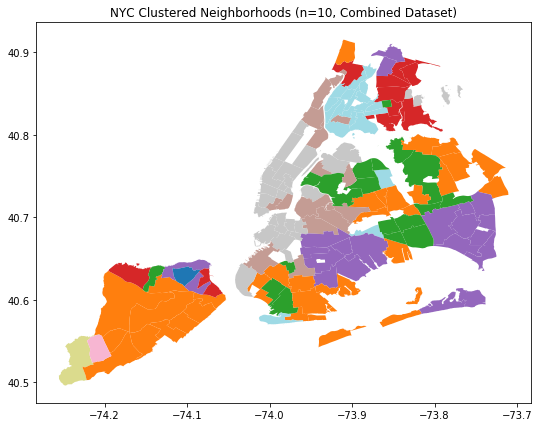

In [324]:
nyc_all.plot(column='kmean',colormap='tab20',figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=10, Combined Dataset)')
plt.savefig('images/map_combined.png')

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


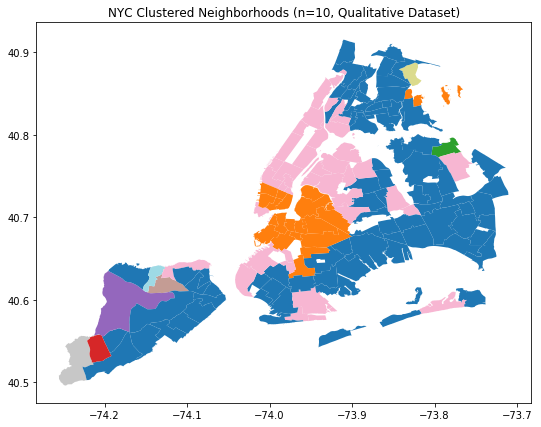

In [325]:
nyc_qual.plot(column='kmean',colormap='tab20',figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=10, Qualitative Dataset)')
plt.savefig('images/map_qual.png')

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


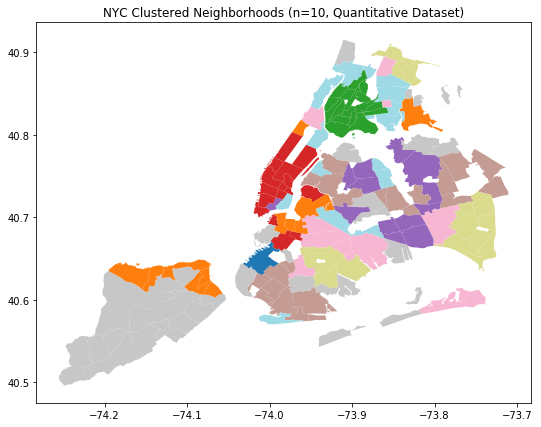

In [326]:
nyc_quant.plot(column='kmean',colormap='tab20',figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=10, Quantitative Dataset)')
plt.savefig('images/map_quant.png')